import pandas as pd

In [7]:
data = pd.read_csv('first inten project.csv')

In [9]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


<h1>Clean Data</h1>

In [12]:
#1-check of duplicated
data.duplicated().sum()

0

In [14]:
#2-check of null values
data.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [16]:
#3-check on datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [18]:
#type of this column categorical [repeated,car parking space]
data['repeated'] = data['repeated'].astype('object')
data['car parking space'] = data['car parking space'].astype('object')

In [24]:
data.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space            object
room type                    object
lead time                     int64
market segment type          object
repeated                     object
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [30]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

In [34]:
data["date of reservation"].isna().sum()

37

In [42]:
#clean data from null values
data = data.dropna()

<h1>Exploratory Data Analysis (EDA)</h1>

<p>categorical columns analysis(unique value)</p>
<p>repeated, room type, car parking space, type of meal, market segment type</p>

In [45]:
data['repeated'].value_counts()

repeated
0    35322
1      926
Name: count, dtype: int64

In [50]:
data['room type'].value_counts()

room type
Room_Type 1    28113
Room_Type 4     6051
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [52]:
data['car parking space'].value_counts()

car parking space
0    35127
1     1121
Name: count, dtype: int64

In [54]:
data['type of meal'].value_counts()

type of meal
Meal Plan 1     27809
Not Selected     5131
Meal Plan 2      3303
Meal Plan 3         5
Name: count, dtype: int64

In [56]:
data['market segment type'].value_counts()

market segment type
Online           23201
Offline          10521
Corporate         2011
Complementary      390
Aviation           125
Name: count, dtype: int64

<h1> Compare Two Categorical Columns</h1>

In [59]:
import matplotlib.pyplot as plt

In [120]:
parking_status = pd.crosstab(data['car parking space'],data['booking status'])
parking_status

booking status,Canceled,Not_Canceled
car parking space,,
0,11768,23359
1,114,1007


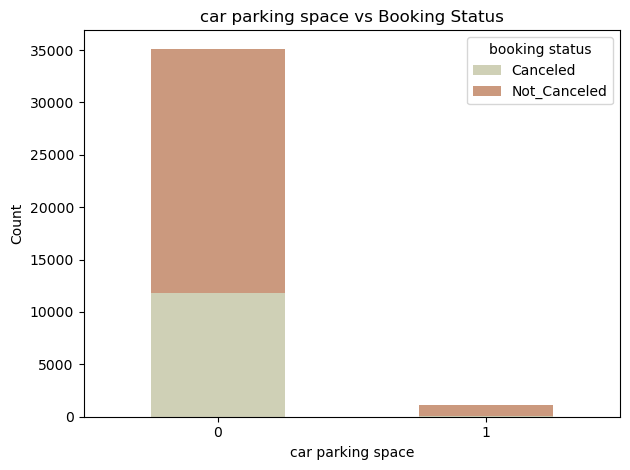

In [347]:
parking_status.plot(kind="bar", stacked=True , color=["#cfd0b6", "#cb997e"])

plt.title("car parking space vs Booking Status")
plt.xlabel("car parking space")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [128]:
repeated_status = pd.crosstab(data['repeated'], data['booking status'])
repeated_status

booking status,Canceled,Not_Canceled
repeated,,
0,11867,23455
1,15,911


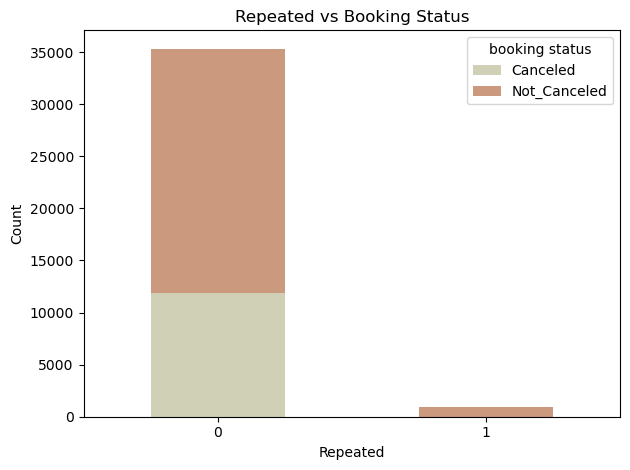

In [345]:
repeated_status.plot(kind="bar", stacked=True, color=["#cfd0b6", "#cb997e"])

plt.title("Repeated vs Booking Status")
plt.xlabel("Repeated")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [102]:
room_status = pd.crosstab(data['room type'],data['booking status'])
room_status

booking status,Canceled,Not_Canceled
room type,,
Room_Type 1,9070,19043
Room_Type 2,228,464
Room_Type 3,2,5
Room_Type 4,2068,3983
Room_Type 5,72,191
Room_Type 6,406,558
Room_Type 7,36,122


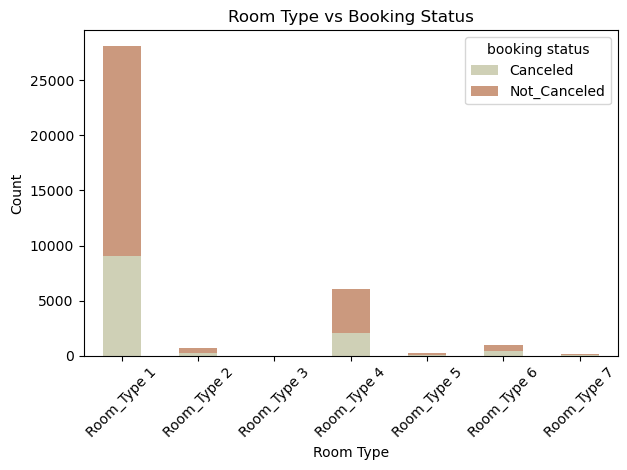

In [343]:
room_status.plot(kind="bar", stacked=True, color=["#cfd0b6", "#cb997e"])

plt.title("Room Type vs Booking Status")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
meal_status = pd.crosstab(data['type of meal'], data["booking status"])
meal_status

booking status,Canceled,Not_Canceled
type of meal,,
Meal Plan 1,8675,19134
Meal Plan 2,1507,1796
Meal Plan 3,1,4
Not Selected,1699,3432


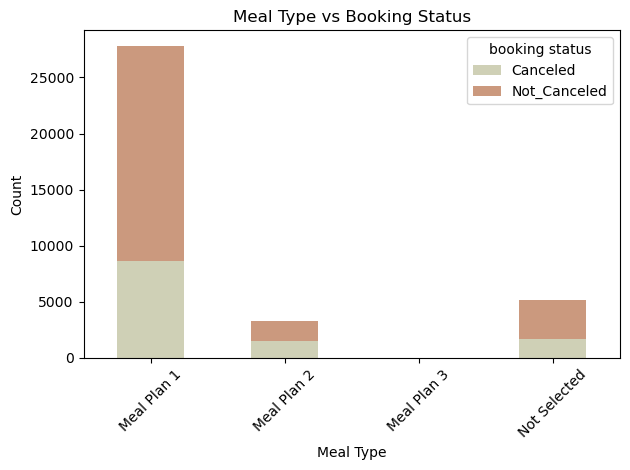

In [341]:
meal_status.plot(kind="bar", stacked=True , color=["#cfd0b6", "#cb997e"])

plt.title("Meal Type vs Booking Status")
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
market_status = pd.crosstab(data['market segment type'], data['booking status'])
market_status

booking status,Canceled,Not_Canceled
market segment type,,
Aviation,37,88
Complementary,0,390
Corporate,220,1791
Offline,3153,7368
Online,8472,14729


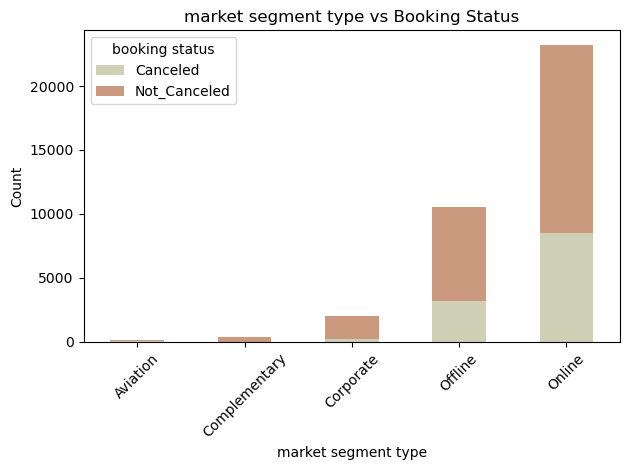

In [339]:
market_status.plot(kind="bar", stacked=True , color=["#cfd0b6", "#cb997e"])

plt.title("market segment type vs Booking Status")
plt.xlabel("market segment type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
three_way = pd.crosstab(
    [data["room type"], data["type of meal"]],
    data["booking status"],
    normalize="index"
)
three_way

booking status            Canceled  Not_Canceled
room type   type of meal                        
Room_Type 1 Meal Plan 1   0.298808      0.701192
            Meal Plan 2   0.465735      0.534265
            Meal Plan 3   1.000000      0.000000
            Not Selected  0.334392      0.665608
Room_Type 2 Meal Plan 1   0.321593      0.678407
            Meal Plan 2   0.375000      0.625000
            Not Selected  0.521739      0.478261
Room_Type 3 Meal Plan 1   0.400000      0.600000
            Not Selected  0.000000      1.000000
Room_Type 4 Meal Plan 1   0.344768      0.655232
            Meal Plan 2   0.323529      0.676471
            Meal Plan 3   0.000000      1.000000
            Not Selected  0.000000      1.000000
Room_Type 5 Meal Plan 1   0.258333      0.741667
            Meal Plan 2   0.642857      0.357143
            Not Selected  0.111111      0.888889
Room_Type 6 Meal Plan 1   0.418950      0.581050
            Meal Plan 2   0.575758      0.424242
            Not Selected  0.045455      0.954545
Room_Type 7 Meal Plan 1   0.236842      0.763158
            Meal Plan 2   0.000000      1.000000
            Meal Plan 3   0.000000      1.000000
            Not Selected  0.000000      1.000000

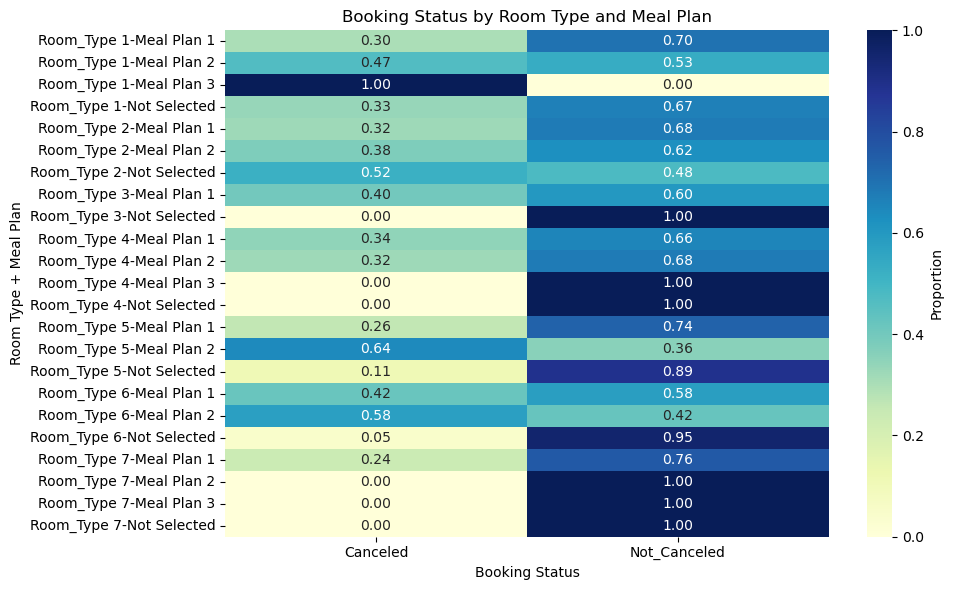

In [142]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(three_way, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title("Booking Status by Room Type and Meal Plan")
plt.xlabel("Booking Status")
plt.ylabel("Room Type + Meal Plan")
plt.tight_layout()
plt.show()

<h1>numerical column</h1>

In [145]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,lead time,P-C,P-not-C,average price,special requests,date of reservation
count,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248
mean,1.845178,0.105302,0.810445,2.204508,85.282360,0.023339,0.152919,103.435350,0.620034,2018-05-24 15:28:31.410284800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518671,0.402597,0.870938,1.410825,85.961536,0.368432,1.753126,35.081308,0.786429,NaN


In [153]:
data.groupby('booking status')['P-C'].agg(['mean','sum','std'])

,mean,sum,std
booking status,,,
Canceled,0.005470,65,0.241799
Not_Canceled,0.032053,781,0.416171


In [155]:
data.groupby('booking status')['P-not-C'].agg(['mean','sum','std'])

,mean,sum,std
booking status,,,
Canceled,0.002188,26,0.129726
Not_Canceled,0.226422,5517,2.132506


<Axes: xlabel='booking status', ylabel='lead time'>

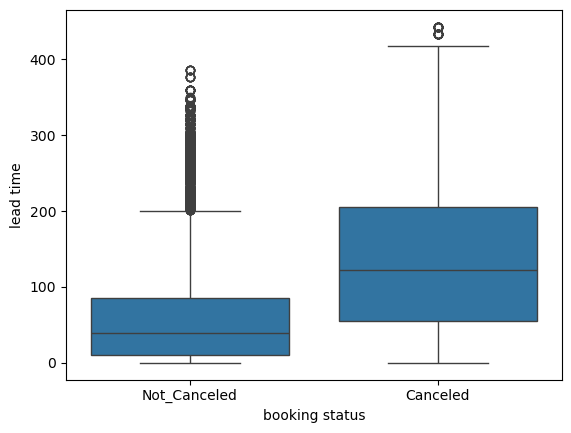

In [244]:
sns.boxplot(x="booking status", y="lead time", data=data)

<Axes: xlabel='booking status', ylabel='average price '>

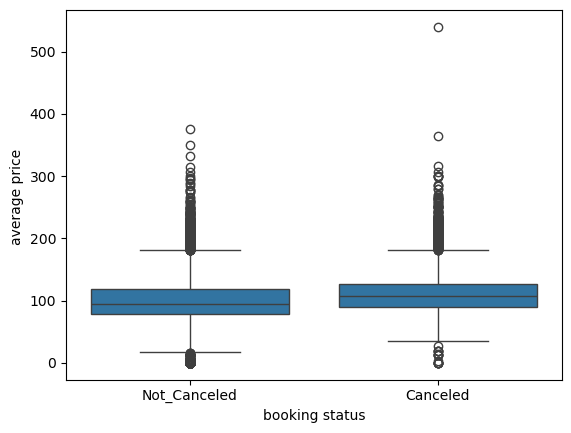

In [254]:
sns.boxplot(x="booking status", y="average price ", data=data)

In [282]:
adults = data.groupby("number of adults")["booking status"].value_counts().unstack()
adults

booking status,Canceled,Not_Canceled
number of adults,,
0,44,95
1,1857,5826
2,9115,16978
3,863,1454
4,3,13


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\3250848811.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  adults.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\3250848811.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  adults.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])


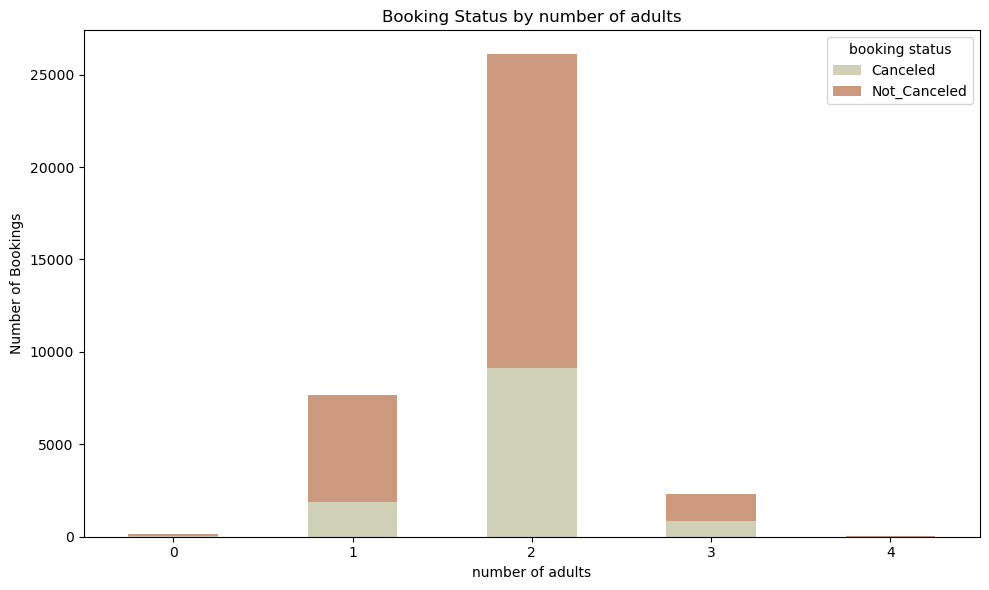

In [337]:
adults.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by number of adults")
plt.xlabel("number of adults")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [278]:
children = data.groupby("number of children")["booking status"].value_counts().unstack()
children

booking status,Canceled,Not_Canceled
number of children,,
0,10880.0,22670.0
1,539.0,1081.0
2,457.0,599.0
3,5.0,14.0
9,1.0,1.0
10,NaN,1.0


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\101193174.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  children.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\101193174.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  children.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])


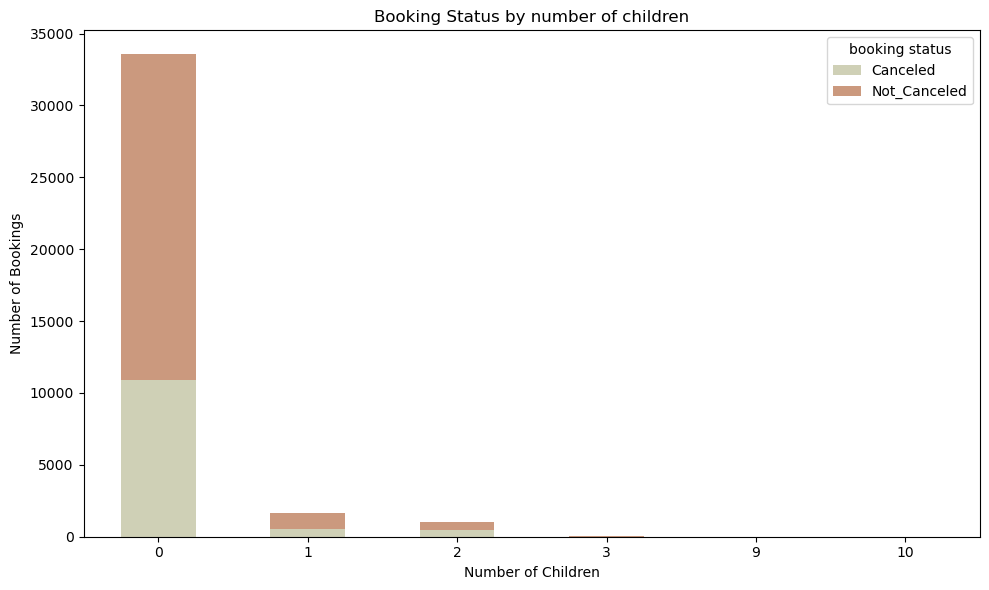

In [335]:
children.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by number of children")
plt.xlabel("Number of Children")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [274]:
special_request = data.groupby("special requests")["booking status"].value_counts().unstack()
special_request

booking status,Canceled,Not_Canceled
special requests,,
0,8542.0,11212.0
1,2703.0,8666.0
2,637.0,3726.0
3,NaN,676.0
4,NaN,78.0
5,NaN,8.0


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2241924408.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  special_request.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2241924408.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  special_request.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])


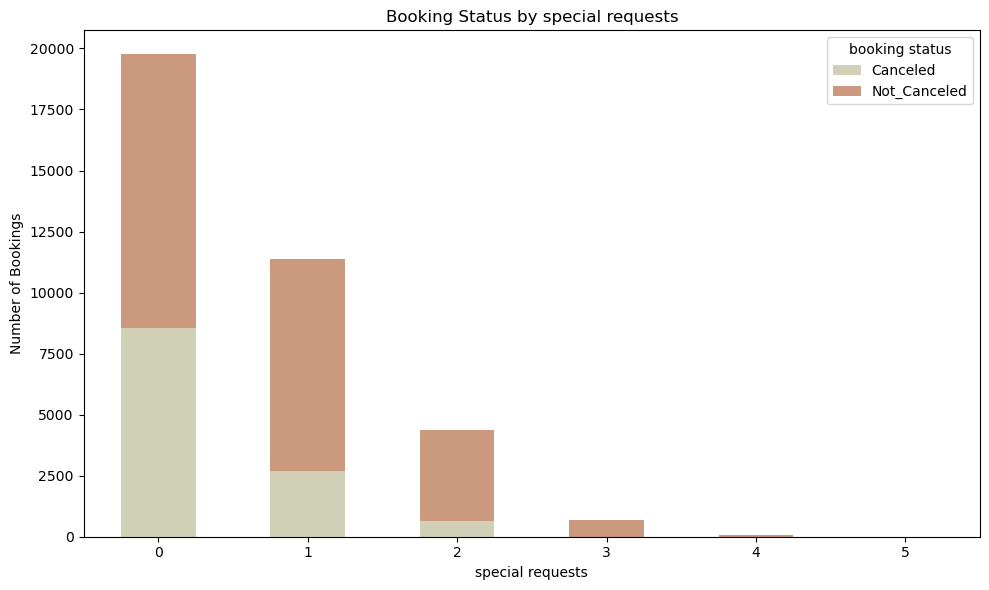

In [333]:
special_request.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by special requests")
plt.xlabel("special requests")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [292]:
 data.groupby('booking status')['number of week nights'].agg(['mean','sum','std'])

,mean,sum,std
booking status,,,
Canceled,2.391853,28420,1.582762
Not_Canceled,2.113149,51489,1.309221


In [294]:
data.groupby('booking status')['number of weekend nights'].agg(['mean','sum','std'])

,mean,sum,std
booking status,,,
Canceled,0.887309,10543,0.919452
Not_Canceled,0.772962,18834,0.843756


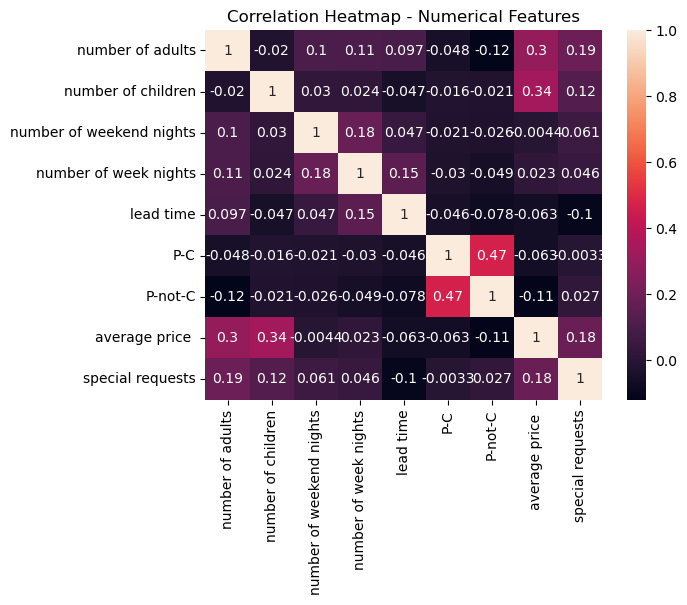

In [159]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

<h1>Extract parts of date</h1>

In [204]:
data["reservation_year"] = pd.to_datetime(data["date of reservation"], errors="coerce").dt.year
data["reservation_month"] = pd.to_datetime(data["date of reservation"], errors="coerce").dt.month
data["reservation_weekday"] = pd.to_datetime(data["date of reservation"], errors="coerce").dt.day_name()

C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\704793068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reservation_year"] = pd.to_datetime(data["date of reservation"], errors="coerce").dt.year
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\704793068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reservation_month"] = pd.to_datetime(data["date of reservation"], errors="coerce").dt.month
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\704793068.py:3: SettingWithCopyWarning: 
A valu

In [206]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation_year,reservation_month,reservation_weekday
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,2015,10,Friday
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,2018,11,Tuesday
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,2018,2,Wednesday
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,2017,5,Saturday
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,2018,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,2018-09-13,Canceled,2018,9,Thursday
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,2017-10-15,Not_Canceled,2017,10,Sunday
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,2018-12-26,Not_Canceled,2018,12,Wednesday
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-07-06,Not_Canceled,2018,7,Friday


In [222]:
#to find the most year
yearly = data.groupby("reservation_year")["booking status"].value_counts().unstack().sort_values("Canceled", ascending=False)
yearly

booking status,Canceled,Not_Canceled
reservation_year,,
2018,10919.0,18811.0
2017,962.0,5554.0
2016,1.0,NaN
2015,NaN,1.0


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2213431508.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  yearly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2213431508.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  yearly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])


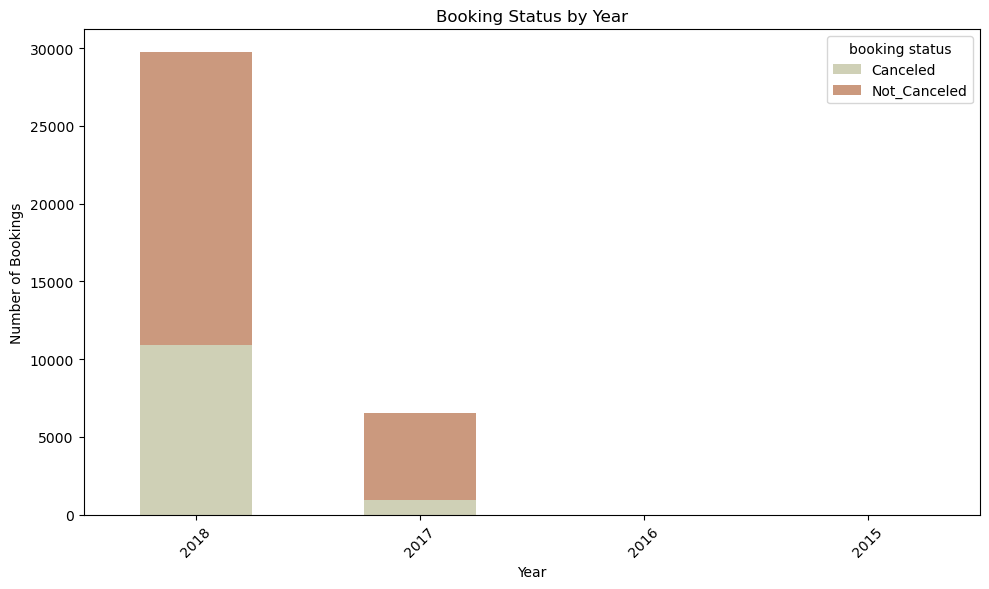

In [329]:
yearly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2" , color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by Year")
plt.xlabel("Year")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [330]:
monthly=data.groupby("reservation_month")["booking status"].value_counts().unstack().sort_values("Canceled", ascending=False)
monthly

booking status,Canceled,Not_Canceled
reservation_month,,
10,1880,3440
9,1539,3073
8,1488,2325
7,1314,1607
6,1291,1912
4,996,1741
5,949,1650
11,875,2106
3,700,1658


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2277313189.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  monthly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2277313189.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  monthly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])


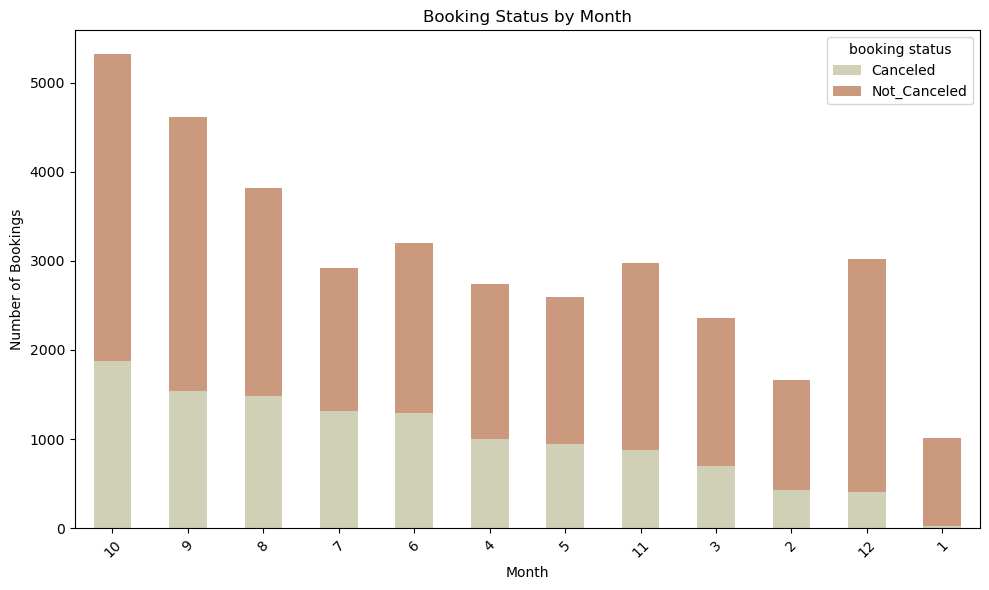

In [349]:
monthly.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [228]:
week_day = data.groupby("reservation_weekday")["booking status"].value_counts().unstack().loc[
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
]
week_day

booking status,Canceled,Not_Canceled
reservation_weekday,,
Monday,1655,3725
Tuesday,1587,3314
Wednesday,1681,3442
Thursday,1430,3115
Friday,1507,3236
Saturday,1731,3689
Sunday,2291,3845


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2464504724.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  week_day.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2464504724.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  week_day.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])


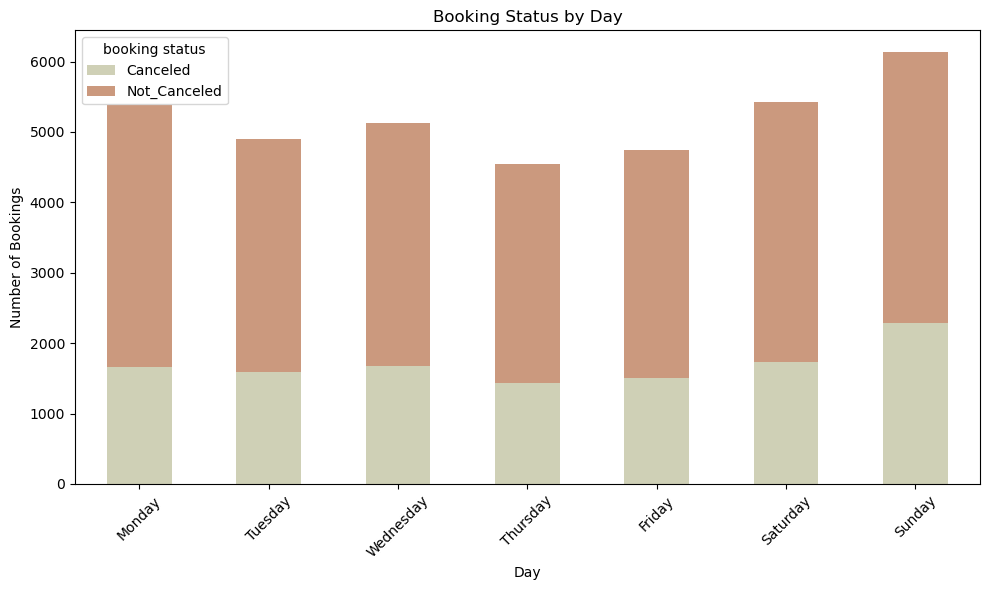

In [351]:
week_day.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by Day")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Add Feature Engineering</h1>

In [297]:
data['total guests'] = data['number of adults'] + data['number of children']

C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2231648285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total guests'] = data['number of adults'] + data['number of children']


In [303]:
data[["number of adults", "number of children", "total guests"]].head()

,number of adults,number of children,total guests
0,1,1,2
1,1,0,1
2,2,1,3
3,1,0,1
4,1,0,1


C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2520414185.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  grouped.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_15140\2520414185.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  grouped.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])


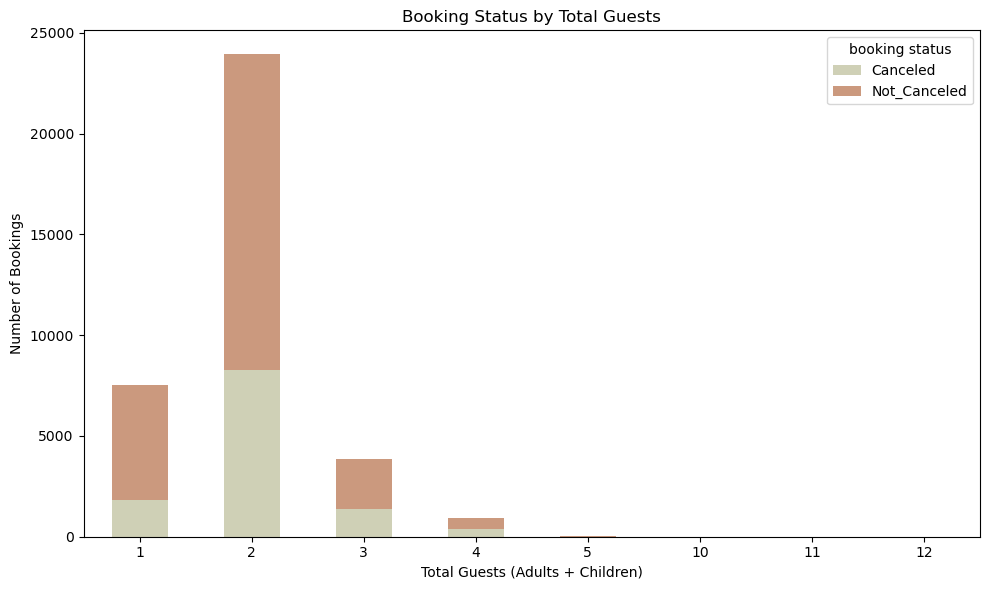

In [353]:
grouped = data.groupby("total guests")["booking status"].value_counts().unstack()

# Plot stacked bar chart
grouped.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2", color=["#cfd0b6", "#cb997e"])
plt.title("Booking Status by Total Guests")
plt.xlabel("Total Guests (Adults + Children)")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Save the cleaned dataset</h1>

In [1]:
data.to_csv('cleaned_first_intern.csv', index=False)

NameError: name 'data' is not defined

In [358]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation_year,reservation_month,reservation_weekday,total guests
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,2015-10-02,Not_Canceled,2015,10,Friday,2
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,2018-11-06,Not_Canceled,2018,11,Tuesday,1
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,2018-02-28,Canceled,2018,2,Wednesday,3
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,2017-05-20,Canceled,2017,5,Saturday,1
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,2018-04-11,Canceled,2018,4,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,...,0,0,115.00,1,2018-09-13,Canceled,2018,9,Thursday,2
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,...,0,0,107.55,1,2017-10-15,Not_Canceled,2017,10,Sunday,2
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,...,0,0,105.61,1,2018-12-26,Not_Canceled,2018,12,Wednesday,2
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,...,0,0,96.90,1,2018-07-06,Not_Canceled,2018,7,Friday,3
